# *Personal medical cost*

Health problems and the high cost of medical services make it an extremely important part of our lives to have health insurance. Not only does it help to cover the cost of any treatment or surgery, but it also gives you the peace of mind that - in the case of an accident - you won't end up with a huge bill that you'll be paying for for the next decade. 

**Columns:**

+ **age**: age of primary beneficiary,
+ **sex**: insurance contractor gender, female, male,
+ **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9,
+ **children**: number of children covered by health insurance / Number of dependents,
+ **smoker**: smoking,
+ **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest,
+ **charges**: Individual medical costs billed by health insurance.

The above set of variables will not only allow us to build a regression model that determines the value of the dependent variable: charges, but it can also be used to test some interesting statistical hypotheses.

------

## Main goal
+ Build a regression model that determines individual medical costs billed by health insurance.


## Side goal
Using selected statistical tests, check whether: 
+ women and men differ by bmi, smoking or charges,
+ smoking is associated with being overweight,
+ regions differ by the amount of insurance paid.

------

## Table of contents🐱‍💻:

1. Packages and loading data
2. Data types and missing values
3. Making a list of qualitative and quantitative variables
4. Data overview
    1. Qualitative variables
    2. Quantitative variables
5. Testing statistical hypotheses  

------


# Packages and loading data

------

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro, mannwhitneyu, chi2_contingency, kruskal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Loading data

df = pd.read_csv("C:/Users/chole/Desktop/Personal_medical_cost/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data types and missing values

------

In [4]:
# Checking the data types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Checking the percentage of missing values

df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Making a list of qualitative and quantitative variables

------

In [6]:
# List of quantitative variables
categ = ['sex', 'smoker', 'region']
# List of qualitative variables
numer = ['age', 'bmi', 'children', 'charges']

# Data overview

------

## Qualitative variables

+ counts 
+ fraction

In [9]:
# Unique values

df.drop(columns=numer).nunique()

sex       2
smoker    2
region    4
dtype: int64

In [13]:
# Levels of unique values

print("Gender:")
print(list(df.sex.unique()))
print()
print("Smoking:")
print(list(df.smoker.unique()))
print()
print("Region:")
print(list(df.region.unique()))

Gender:
['female', 'male']

Smoking:
['yes', 'no']

Region:
['southwest', 'southeast', 'northwest', 'northeast']


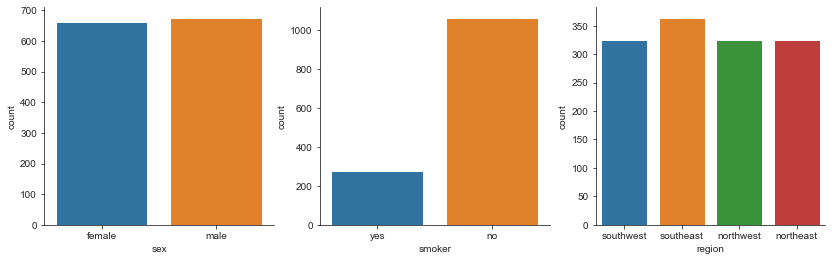

In [14]:
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(14, 4))

# Loop to make graphs
for col in df[["sex", "smoker", "region"]]:
    plt.pyplot.subplot(1,3, count)
    sns.countplot(df[col])
    count+=1

## Quantitative variables

In [15]:
# Descriptive statistics

df.loc[:,numer].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# Coefficient of variation

"""
The coefficient of variation provides a relative measure of variation 
thus allowing comparison of variables with different units of measurement.

It characterizes the ratio of the intensity of the secondary causes to the primary causes.

Source: Biostatystyka, red. A.Stanisz (book)
"""
def cv(x): return np.std(x) / np.mean(x) * 100
df.loc[:, numer].apply(cv)

age          35.821919
bmi          19.880079
children    110.057777
charges      91.221551
dtype: float64

In [17]:
# Kurtosis

"""
Kurtosis is a measure of outliers. 
The higher its value, the more likely there are outliers in the database. 
The lower the value, the more the results are clustered around the mean.
Safe threshold: K=|3|. 

Source: Biostatystyka, red. A.Stanisz (book)
"""
df.loc[:, numer].apply(kurtosis, bias=False)

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

In [18]:
# Skewness

"""
Skewness, in statistics, is the degree of asymmetry observed in a probability distribution.
Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. 
A normal distribution (bell curve) exhibits zero skewness.

The mean of positively skewed data will be greater than the median. 
The mean of negatively skewed data will be less than the median.

Source: https://www.investopedia.com/terms/s/skewness.asp
"""
df.loc[:, numer].apply(skew, bias=False)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

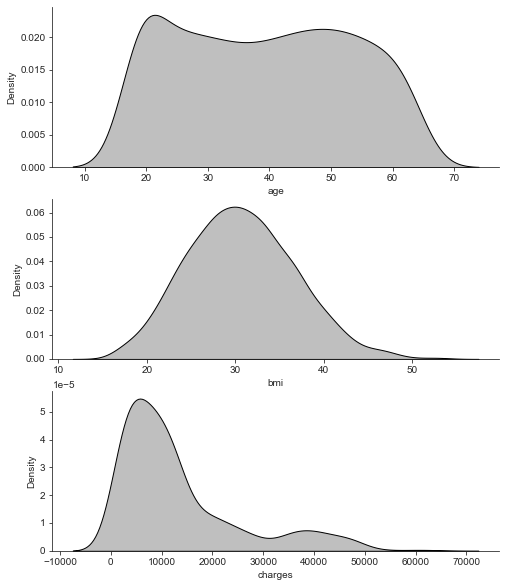

In [19]:
# Density/distribution graphs

count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df[["age", "bmi", "charges"]]:
    plt.pyplot.subplot(3,1, count)
    sns.kdeplot(df[col],
                shade=True,
                color='k')
    count+=1

In [20]:
# Test of normality

"""
The Shapiro-Wilk test is a test of normality. 
It is used to determine whether or not a sample comes from a normal distribution.

H0: the distribution of the data --are not-- significantly different from normal distribution.
H1: the distribution of the data --are------ significantly different from normal distribution.

Source: https://www.statology.org/shapiro-wilk-test-python/
"""
# Divide the dataset by category to meet hypothesis testing assumptions.
df_female = df.loc[df.loc[:,"sex"]=="female"]
df_male = df.loc[df.loc[:,"sex"]=="male"]

df_smoker = df.loc[df.loc[:,"smoker"]=="yes"]
df_n_smoker = df.loc[df.loc[:,"smoker"]=="no"]

df_southW = df.loc[df.loc[:,"region"]=="southwest"]
df_southE = df.loc[df.loc[:,"region"]=="southeast"]
df_northW = df.loc[df.loc[:,"region"]=="northwest"]
df_northE = df.loc[df.loc[:,"region"]=="northeast"]

# Database list
data_sets = [df_male, df_female, df_smoker, df_n_smoker, df_southW, df_southE, df_northW, df_northE]

# Empty list for results
pf = []

# Loop for test of normality
for i in data_sets:
    i = i.loc[:,['age', 'bmi', 'charges']].apply(shapiro)
    pf.append(i)

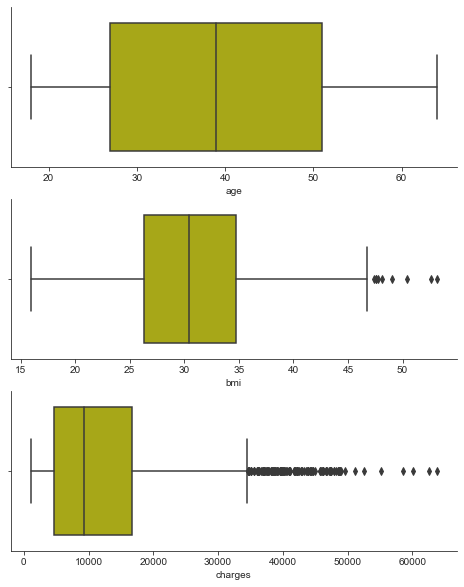

In [31]:
# Outliers

"""
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal. 
Before abnormal observations can be singled out, it is necessary to characterize normal observations.

Source: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
"""
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df[["age", "bmi", "charges"]]:
    plt.pyplot.subplot(3,1, count)
    sns.boxplot(df[col],
                orient="h",
                color='y')
    count+=1

Text(0.5, 1.0, 'Correlogram')

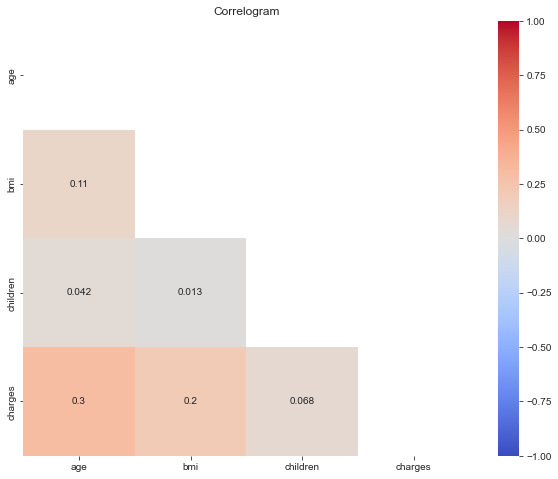

In [32]:
# Pearson’s correlation

"""
Correlation between sets of data is a measure of how well they are related. 
The most common measure of correlation in stats is the Pearson Correlation. 
It shows the linear relationship between two sets of data. 
It is not able to tell the difference between dependent variables and independent variables.

Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
"""
plt.rcParams['figure.figsize'] = [10, 8]  # for size

sns.heatmap(df.loc[:,numer].corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmax=1, vmin=-1, # cause corr can be in range from 1 to -1
            mask=np.triu(df.loc[:,numer].corr())).set_title("Correlogram")

# Testing statistical hypotheses

------

## case 1

## case 2